In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Harmonic Oscillator

$ \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 $

Here, $ b $ is the damping parameter and $ c $ is determined by the pendulum length $ c = \frac{g}{l} $.

## Small-angle approximation

For small angles $ \theta\ll 1 $ and without damping b = 0, we have 

$ \theta''(t) = - \frac{g}{l}\theta(t) $ with the solution (for $ \theta'(0) = 0 $)

$ \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) $ and a period of $ T = 2\pi\sqrt{\frac{l}{g}} $

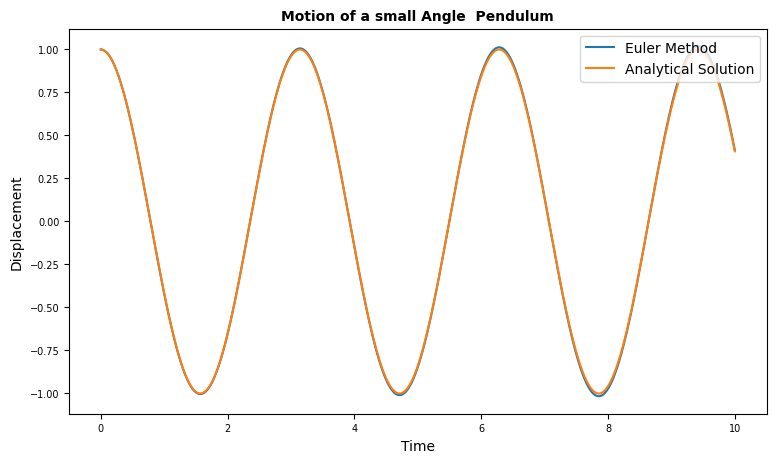

In [21]:
def plot_setup():
    plt.figure(figsize=(9,5))
    plt.yticks(fontsize=7)
    plt.xticks(fontsize=7)
fontdict={"fontsize":10, "fontweight":"bold"}
plot_setup()
x0=1
xdash0=0
omega=2
m=1
tlist=np.linspace(0,10,5000)
h=tlist[2]-tlist[1]

def diff_eqn(xt,xdasht):
    return -1*(omega**2)*xt

def second_order_solution(diff_eqn=diff_eqn, x0=x0,xdash0=xdash0,tlist=tlist):
    xdash=[xdash0]
    x=[x0]
    for n in range(1,len(tlist)):
        newxdash= xdash[n-1]+(((diff_eqn(xt=x[n-1],xdasht=xdash[n-1]))+0)*h)
        xdash.append(newxdash)
        newx=x[n-1]+(xdash[n-1]*h) +(1/2*diff_eqn(xt=x[n-1],xdasht=xdash[n-1])*h**2)
        x.append(newx)
    return x
x=second_order_solution()
plt.plot(tlist,x, label="Euler Method")
plt.plot(tlist,x0*np.cos(omega*tlist),label="Analytical Solution")
plt.title("Motion of a small Angle  Pendulum",fontdict=fontdict)
plt.legend(loc="upper right")
plt.ylabel("Displacement")
plt.xlabel("Time")
plt.show()

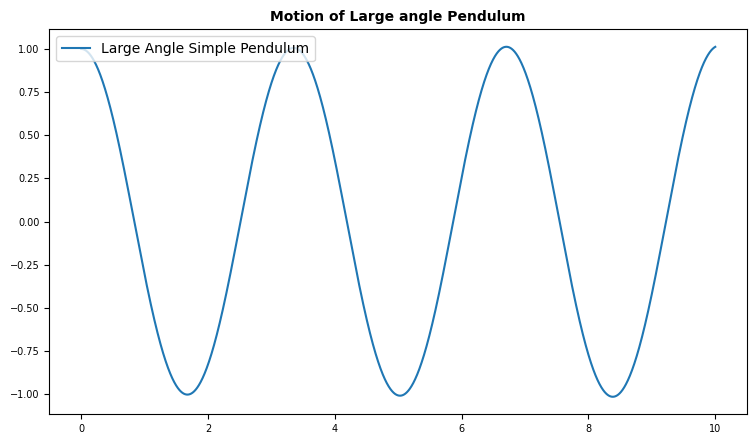

In [ ]:
plot_setup()
def large_angle(xt,xdasht):
    return -1*(omega**2)*np.sin(xt)
x=second_order_solution(diff_eqn=large_angle)
plt.plot(tlist,x,label="Large Angle Simple Pendulum")
plt.legend(loc="upper left")
plt.title("Motion of Large angle Pendulum",fontdict=fontdict)
plt.show()



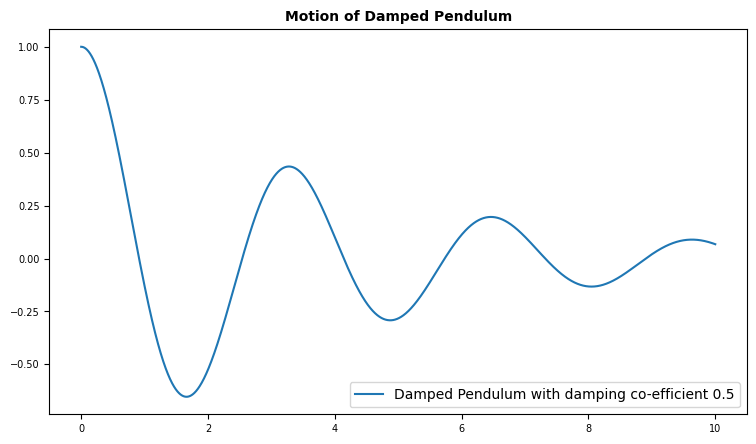

In [31]:
damp_constant=0.5

plot_setup()
def large_angle(xt,xdasht):
    return -1*(omega**2)*np.sin(xt)-(damp_constant*xdasht)
x=second_order_solution(diff_eqn=large_angle)
plt.plot(tlist,x,label="Damped Pendulum with damping co-efficient 0.5")
plt.legend(loc="lower right")
plt.title("Motion of Damped Pendulum",fontdict=fontdict)
plt.show()
